# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Tujuan

Proyek ini befokus pada Exploratory Data Analysis(EDA) dan Data Visualization. Analisis yang dilakukan yaitu menentukan hubungan antara harga sebuah mobil dengan usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Selanjutnya ditentukan faktor yang paling memengaruhi harga kendaraan. Data dianalisis menggunakan teknik statistik atau alat visualisasi untuk mengidentifikasi pola atau tren serta untuk mengungkap insights dalam data.

### Hipotesis

1. Mobil yang memiliki usia yang lebih tua memiliki harga mobil yang lebih murah.
2. Jarak tempuh mobil yang lebih kecil memiliki harga mobil yang lebih murah.
3. Mobil dengan kondisi yang bagus memiliki harga mobil yang lebih mahal.
4. Tipe transmisi mobil matic lebih mahal daripadi tipe transisi mobil manual.
5. Warna-warna yang tidak umum, seperti kuning, hijau, biru, merah, cenderung kurang peminat. Ini menjadikan dari segi harga tidak sebaik warna hitam, putih atau silver.

### Tahapan

Data tentang spesifikasi mobil disimpan dalam file `/datasets/vehicles_us.csv`. Tidak ada informasi terkait kualitas data tersebut, jadi perlu dilakukan pemeriksaan terlebih dahulu sebelum menguji hipotesis.

Proyek ini terdiri dari dua tahap:

1. Pra-pemrosesan Data
2. Analisis Data Exploratif (EDA)


## 1. Pra-pemrosesan

**Import *library* yang dibutuhkan:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1.1. Memuat Data

In [2]:
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv') 

data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### 1.2. Mengeksplorasi Data Awal

**Deskripsi Data**: 


- `price` — harga mobil
- `model_year` — tahun produksi mobil
- `model` — merk dan seri mobil
- `condition`  — kondisi mobil
- `cylinders` — jumlah silinder mesin mobil
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` — tipe transisi mobil
- `type` — tipe mobil
- `paint_color` — warna mobil
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
32971,7988,2004.0,bmw x5,good,8.0,gas,88671.0,automatic,SUV,NaN,1.0,2018-10-16,18
37791,32200,2017.0,ford f-150,excellent,6.0,gas,38000.0,manual,pickup,blue,1.0,2018-08-26,62
26661,10995,2012.0,subaru outback,excellent,4.0,gas,NaN,automatic,wagon,silver,1.0,2019-02-19,49
51426,8500,2006.0,dodge dakota,good,8.0,gas,80426.0,automatic,pickup,grey,1.0,2018-12-02,14
22411,2395,2001.0,subaru outback,good,4.0,gas,295000.0,automatic,wagon,white,1.0,2018-08-25,59
30155,21900,2013.0,ford mustang gt coupe 2d,good,8.0,gas,NaN,other,coupe,silver,NaN,2018-11-07,78
16094,3600,2011.0,nissan versa,excellent,4.0,gas,137000.0,automatic,hatchback,silver,NaN,2018-10-14,72
12800,14998,2005.0,toyota tacoma,excellent,6.0,gas,135477.0,automatic,pickup,green,NaN,2019-03-18,16
4987,8400,2015.0,hyundai sonata,good,4.0,gas,94688.0,automatic,sedan,silver,NaN,2019-01-16,61
12256,6995,2009.0,honda civic,excellent,4.0,gas,82993.0,automatic,sedan,silver,NaN,2018-08-01,82


**Kesimpulan sementara:**

* Dari 10 data pertama, terlihat ada beberapa nilai yang hilang. 
* Kolom `model_year` akan terlihat lebih rapih apabila menggunakan integer.
* Kolom `condition` terlihat lebih rapih apabila nilai string diganti dengan skala numerik.
* Kolom `date_posted` sebaiknya menggunakan format dtype datetime64.

In [6]:
data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

In [7]:
print(data['transmission'].unique())
print(data['type'].unique())

['automatic' 'manual' 'other']
['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


In [8]:
data.duplicated().sum()

0

**Kesimpulan sementara:**

* Kolom `model_year`, `cylinders`, `odometer`, `paint_color`, dan  `is_4wd` terdapat nilai hilang yang perlu dianalisis.
* Kolom `transmission` dan `type` terdapat nilai other yang merupakan anomali sehingga perlu dianalisis lebih dalam.
* Dataset tidak memiliki duplikat pada datanya.


In [9]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**Kesimpulan sementara:**

* Kolom `price` terdapat nilai yang tidak wajar, yaitu min price adalah 1.000000 sehingga perlu dianalisis.
* Kolom `transmission` dan `type` terdapat nilai other yang merupakan anomali sehingga perlu dianalisis lebih dalam.
* Dataset tidak memiliki duplikat pada datanya.


### Kesimpulan dan Langkah-Langkah Selanjutnya

#### **Nilai yang Hilang**

Setiap baris dalam tabel menyimpan data terkait harga sebuah mobil yang telah terjual. Sejumlah kolom menyimpan data yang mendeskripsikan mobil itu sendiri: tahun produksi, merk mobil, kondisi mobil, silinder mesin, tipe gas, jarak tembuh mobil, tipe transisi, tipe mobil, warna mobil, dan tipe kendaraan yang memiliki penggerak 4 roda. Sisanya menyimpan data terkait informasi mobil terjual: tanggal iklan ditayangkan serta hari iklan ditayangkan hingga dihapus.

Jelas bahwa data yang kita miliki cukup untuk menguji hipotesis. Meski demikian, kita memiliki nilai-nilai yang hilang.

* Nilai yang hilang dalam kolom `cylinders` dan `is_4wd` tidak begitu penting karena nilai yang hilang tersebut tidak berpengaruh terhadap penelitian. Cukup menggantinya dengan penanda yang jelas. 
* Nilai yang hilang dalam kolom `model_year`, `odometer`, dan `paint_color` dapat memengaruhi perbandingan harga sebuah kendaraan. Oleh sebab itu perlu dilakukan evaluasi mengenai seberapa besar nilai yang hilang dapat memengaruhi perhitungan.

Alasan mengapa data tersebut hilang sangatlah berguna untuk mempelajari dan mencoba memperbaikinya namun sayangnya, kita belum memiliki kesempatan tersebut dalam proyek ini.

#### **Gaya Penulisan**

Setelah mengatasi nilai-nilai yang hilang, langkah selanjutnya yaitu merapihkan data:

* Mengubah nilai pada kolom `model_year` menjadi integer.
* Mengganti nilai pada kolom `condition` menjadi skala numerik.
* Mengubah format dtype pada kolom `date_posted` menjadi format datetime64.
* Akan lebih baik apabila terdapat data tentang hari dalam minggu, bulan, dan tahun iklan ditayangkan.
* Menambahkan kolom baru tentang usia kendaraan (dalam tahun) ketika iklan ditayangkan dan jarak tempuh rata-rata kendaraan per tahun.

#### **Duplikat**

Selanjutnya memeriksa duplikat pada data. Namun, pada dataset ini tidak memiliki data duplikat pada data. Sehingga tidak perlu dilakukan analisis duplikat awal.

#### **Anomali Data**

Setelah memeriksa data duplikat perlu memepertimbangkan data anomali berikut, karena data tersebut mempengaruhi analisis penelitian.

* Pada kolom `price` terdapat nilai harga mobil yang tidak wajar, yaitu 1.000000.
* Pada kolom `transmission` dan `type` terdapat nilai **other** yang seharusnya diketahui karena merupakan data yang mendeskripsikan mobil itu sendiri.

### 1.3. Mengatasi Nilai-Nilai yang Hilang

In [10]:
data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

**Langkah pertama** dalam menangani nilai-nilai yang hilang yaitu menghitung persentasenya serta dibandingkan dengan keseluruhan data untuk mengetahui dampak dari nilai-nilai yang hilang tersebut terhadap dataset.

In [11]:
for col in data.columns:
    missing = data[col].isnull().sum()
    total = data[col].shape[0]
    percent = (missing/total) * 100
    print(f"Kolom {col}: {percent:.2f}% nilai yang hilang.")

Kolom price: 0.00% nilai yang hilang.
Kolom model_year: 7.02% nilai yang hilang.
Kolom model: 0.00% nilai yang hilang.
Kolom condition: 0.00% nilai yang hilang.
Kolom cylinders: 10.21% nilai yang hilang.
Kolom fuel: 0.00% nilai yang hilang.
Kolom odometer: 15.32% nilai yang hilang.
Kolom transmission: 0.00% nilai yang hilang.
Kolom type: 0.00% nilai yang hilang.
Kolom paint_color: 17.99% nilai yang hilang.
Kolom is_4wd: 50.37% nilai yang hilang.
Kolom date_posted: 0.00% nilai yang hilang.
Kolom days_listed: 0.00% nilai yang hilang.


**Kesimpulan sementara:**

* Persentase data yang hilang pada pada kolom `is_4wd` yaitu 50.37%.
* Persentase data yang hilang pada pada kolom `paint_color` yaitu 17.99%. 
* Persentase data yang hilang pada pada kolom `odometer` yaitu 15.32%.
* Persentase data yang hilang pada pada kolom `cylinders` yaitu 10.21%.
* Persentase data yang hilang pada pada kolom `model_year` yaitu 7.02%.

Dalam beberapa situasi, nilai yang hilang jika bagiannya tidak banyak (katakanlah, 5-10%), nilai tersebut dapat dihapus.


**Langkah kedua** dalam menangani nilai-nilai yang hilang yaitu menentukan nilai yang hilang termasuk dalam variabel kategoris atau kuantitatif.

In [12]:
def find_missing_variable_type(data):
    
    missing_variable_type = {}
    
    for col in data.columns:
        unique_values = data[col].nunique()
        
        # Jika ada kurang dari 400 nilai unik, asumsikan kolom tersebut adalah kategoris
        if unique_values < 400:
            missing_variable_type[col] = "kategoris"
        # Kalau tidak, asumsikan kolom itu kuantitatif
        else:
            missing_variable_type[col] = "kuantitatif"
    
    return missing_variable_type

In [13]:
missing_variable_type = find_missing_variable_type(data)
print(missing_variable_type)

{'price': 'kuantitatif', 'model_year': 'kategoris', 'model': 'kategoris', 'condition': 'kategoris', 'cylinders': 'kategoris', 'fuel': 'kategoris', 'odometer': 'kuantitatif', 'transmission': 'kategoris', 'type': 'kategoris', 'paint_color': 'kategoris', 'is_4wd': 'kategoris', 'date_posted': 'kategoris', 'days_listed': 'kategoris'}


**Kesimpulan sementara:**

* Kolom `is_4wd` memiliki nilai hilang yang termasuk variabel katagoris.
* Kolom `paint_color` memiliki nilai hilang yang termasuk variabel kategoris. 
* Kolom `odometer` memiliki nilai hilang yang termasuk variabel kuantitatif.
* Kolom `cylinders` memiliki nilai hilang yang termasuk variabel katagoris.
* Kolom `model_year` memiliki nilai hilang yang termasuk variabel katagoris.

**Langkah ketiga** dalam menangani nilai-nilai yang hilang yaitu:


1. Jika kategoris maka ditentukan apakah nilai yang hilang memiliki suatu pola. 
* Jika nilainya tidak terdapat pola, nilai tersebut dapat diganti dengan nilai default, seperti string kosong atau kata tertentu. 
* Jika berpola, maka perlu analisis lebih lanjut.


2. Jika kuantitatif maka ditentukan apakah data memiliki outlier yang signifikan.
* Jika tidak terdapat outlier yang signifikan, nilai tersebut dapat dihitung rata-rata data pada kolom atau seluruh dataset.
* Jika data memiliki oulier yang signifikan, nilai tersebut dapat dihitung median data pada kolom atau seluruh dataset.

In [14]:
def check_missing_pattern(data):
    
    missing_pattern = {}
    
    for col in data.columns:
        # Buat boolean mask untuk mengidentifikasi nilai yang hilang
        mask = data[col].isnull()
        # Dapatkan jumlah nilai yang hilang
        missing = data[col].isnull().sum()
        
        # Jika tidak ada nilai yang hilang, polanya adalah "none"
        if missing == 0:
            missing_pattern[col] = "none"
        # Jika ada nilai yang hilang, periksa apakah ada polanya
        else:
            # Buat boolean mask untuk mengidentifikasi nilai yang tidak hilang
            mask_not_missing = ~mask
            # Hitung jumlah nilai unik di kolom
            unique_values = data[col].nunique()
            # Jika ada lebih sedikit nilai unik daripada nilai yang hilang, polanya adalah "random"
            if unique_values < missing:
                missing_pattern[col] = "random"
            # Jika tidak, polanya adalah "pattern"
            else:
                missing_pattern[col] = "pattern"
    
    return missing_pattern


In [15]:
missing_pattern = check_missing_pattern(data)
print(missing_pattern)

{'price': 'none', 'model_year': 'random', 'model': 'none', 'condition': 'none', 'cylinders': 'random', 'fuel': 'none', 'odometer': 'pattern', 'transmission': 'none', 'type': 'none', 'paint_color': 'random', 'is_4wd': 'random', 'date_posted': 'none', 'days_listed': 'none'}


**Kesimpulan sementara:**

* Kolom `is_4wd` memiliki nilai hilang yang tidak berpola.
* Kolom `paint_color` memiliki nilai tidak berpola. 
* Kolom `odometer` memiliki nilai hilang yang berpola.
* Kolom `cylinders` memiliki nilai hilang yang tidak berpola.
* Kolom `model_year` memiliki nilai hilang yang tidak berpola.

**Kolom `is_4wd`** memiliki nilai hilang sebesar 50.37% dengan variabel katagoris dan tidak berpola. Maka nilai hilang tersebut dapat diisi dengan nilai yang lainnya, yaitu 1.0.

In [16]:
data['is_4wd'] = data['is_4wd'].fillna(1.0)

**Kolom `paint_color`** memiliki nilai hilang sebesar 17.99% dengan variabel katagoris dan tidak berpola. Maka nilai hilang tersebut dapat diisi dengan nilai yang lainnya, 'unknown'.

In [17]:
data['paint_color'] = data['paint_color'].fillna('unknown')

**Kolom `odometer`** memiliki nilai hilang sebesar 15.32% dengan variabel kuantitatif. Maka nilai hilang tersebut ditentukan terlebih dahulu outliernya.

**Kolom `cylinders`** memiliki nilai hilang sebesar 10.21% dengan variabel katagoris dan tidak berpola. Maka nilai hilang tersebut dapat diisi dengan nilai yang lainnya, yaitu 0.0

In [18]:
data['cylinders'] = data['cylinders'].fillna(0.0)

**Kolom `model_year`** memiliki nilai hilang sebesar 7.02% dengan variabel variabel katagoris dan tidak berpola. Maka nilai hilang tersebut dapat diisi dengan nilai yang lainnya. Namun karena kolom ini akan mempengaruhi penelitan, maka nilai hilang akan diisi dengan median. 

In [19]:
data.isna().sum().sort_values(ascending=False)

odometer        7892
model_year      3619
price              0
model              0
condition          0
cylinders          0
fuel               0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Nilai hilang pada tiap kolom sementara diisi dengan median untuk mempermudah riset penelitan. Hipotesis awal adalah nilai tersebut memiliki outlier yang signifikan. Data dibuat baru agar tidak mempengaruhi data awal.

In [20]:
data_new = data.copy()

def fill_missing_value (dataframe, agg_column, value_column):
    
    # Menghitung nilai median untuk setiap grup di kolom agregasi
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    
    # Mengsi nilai yang hilang pada kolom dengan nilai median yang dihitung untuk setiap grup
    dataframe[value_column] = dataframe[value_column].fillna(dataframe[agg_column].map(grouped_values.set_index(agg_column)[value_column]))
    
    return dataframe

In [21]:
# mengisi nilai yang hilang pada kolom odometer
data_new = fill_missing_value(data_new, 'condition', 'odometer')

# mengisi nilai yang hilang pada kolom model_year
data_new = fill_missing_value(data_new, 'model', 'model_year') 


In [22]:
data_new.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### 1.4. Memperbaiki Tipe Data

Data pada kolom `model_year` diubah menjadi integer.

In [23]:
data_new['model_year'] = data_new['model_year'].astype(int)

Data pada kolom `condition` diubah menjadi skala numerik.

In [24]:
def conditions(scale):   
    if scale == 'new':
        return 5
    if scale == 'like new':
        return 4
    if scale == 'excellent':
        return 3
    if scale == 'good':
        return 2
    if scale == 'fair':
        return 1
    else:
        return 0
    return 'Unidentified' 

In [25]:
data_new['condition'] = data_new['condition'].apply(conditions)
data_new['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Data pada kolom `date_posted` diubah formatnya menjadi format datetime64.

In [26]:
data_new['date_posted'] = pd.to_datetime(data_new['date_posted'], format='%Y-%m-%d')
data_new['date_posted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: date_posted
Non-Null Count  Dtype         
--------------  -----         
51525 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 402.7 KB


### 1.5. Memperbaiki Kualitas Data

Menambahkan kolom hari dalam minggu, bulan, dan tahun iklan ditayangkan.

In [27]:
data_new['day_of_week'] = data_new['date_posted'].dt.day_name()
data_new['month'] = data_new['date_posted'].dt.month_name()
data_new['year'] = data_new['date_posted'].dt.year

Menambahkan kolom usia kendaraan (dalam tahun) ketika iklan ditayangkan.

In [28]:
data_new['car_age'] = data_new['year'] - data_new['model_year']

Menambahkan kolom jarak tempuh rata-rata kendaraan per tahun.

In [29]:
data_new['avg_mileage'] = data_new['odometer'] / data_new['car_age'].mean()

## 2. Analisis Data Exploratif (EDA)

### 2.1. Memeriksa Data yang Sudah Bersih

In [30]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_of_week   51525 non-null  object        
 14  month         51525 non-null  object        
 15  year          51525 non-null  int64 

In [31]:
data_new.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,car_age,avg_mileage
17026,7995,2007,ford f-150,3,0.0,gas,189115.0,automatic,truck,black,1.0,2019-04-07,27,Sunday,April,2019,12,22212.484242
23486,14900,2013,dodge grand caravan,3,6.0,gas,140000.0,automatic,mini-van,white,1.0,2018-07-12,75,Thursday,July,2018,5,16443.686614
2818,8995,2011,ford escape,3,6.0,gas,101188.0,automatic,wagon,grey,1.0,2018-12-03,38,Monday,December,2018,7,11885.026865
48038,10499,2015,volkswagen passat,3,4.0,gas,67796.0,automatic,sedan,black,1.0,2018-09-27,22,Thursday,September,2018,3,7962.972698
30438,35900,2019,jeep wrangler unlimited,3,4.0,gas,14410.0,automatic,SUV,yellow,1.0,2019-02-05,6,Tuesday,February,2019,0,1692.525172
10742,5990,2009,toyota camry le,3,4.0,gas,104230.0,automatic,sedan,white,1.0,2019-03-29,34,Friday,March,2019,10,12242.324684
44076,29299,2015,chevrolet tahoe,4,8.0,gas,89000.0,automatic,SUV,grey,1.0,2018-06-03,26,Sunday,June,2018,3,10453.486490
47566,6550,2015,nissan versa,3,4.0,gas,75000.0,automatic,sedan,black,1.0,2018-05-12,27,Saturday,May,2018,3,8809.117829
29119,44000,2018,jeep wrangler,3,4.0,gas,8600.0,automatic,SUV,unknown,1.0,2018-12-14,76,Friday,December,2018,0,1010.112178
15660,7950,2013,ford fusion se,2,4.0,gas,107819.0,automatic,sedan,silver,1.0,2019-02-08,29,Friday,February,2019,6,12663.870336


In [32]:
data_new.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,car_age,avg_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.0,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,5.499932,115199.014508,1.0,39.55476,2018.307462,8.513906,13530.689234
std,10040.803015,6.099381,0.712447,2.431985,60484.863376,0.0,28.20427,0.461447,6.112976,7104.243844
min,1.000000,1908.000000,0.000000,0.000000,0.000000,1.0,0.00000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,1.0,19.00000,2018.000000,4.000000,8887.577705
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,1.0,33.00000,2018.000000,8.000000,13026.688535
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,1.0,53.00000,2019.000000,12.000000,17362.301421
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.0,271.00000,2019.000000,110.000000,116280.355340


# INI ADALAH DATA YANG DIPELAJARI DI EDA PLATFORM
PENGECHEAKAN TIAP MATERI SEBELUM DIMASUKKAN KEDALAM REAL DATA

In [33]:
data_new.loc[data_new['price'] == 1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,car_age,avg_mileage
405,1,2014,chevrolet camaro,3,6.0,gas,71310.0,automatic,coupe,unknown,1.0,2018-07-14,29,Saturday,July,2018,4,8375.709232
3063,1,1998,chevrolet silverado,2,8.0,gas,164000.0,automatic,pickup,unknown,1.0,2018-10-11,49,Thursday,October,2018,20,19262.604319
3808,1,2007,chevrolet tahoe,2,8.0,gas,200.0,automatic,SUV,red,1.0,2019-03-18,63,Monday,March,2019,12,23.490981
3902,1,1996,ford f-150,1,0.0,gas,163000.0,manual,truck,white,1.0,2019-02-23,54,Saturday,February,2019,23,19145.149414
4140,1,2004,chevrolet silverado,3,8.0,diesel,83000.0,automatic,pickup,unknown,1.0,2019-02-04,14,Monday,February,2019,15,9748.757064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007,chevrolet trailblazer,3,8.0,gas,104230.0,automatic,SUV,black,1.0,2018-08-06,28,Monday,August,2018,11,12242.324684
49709,1,2010,ford f150,3,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18,Monday,March,2019,9,16408.450142
50245,1,1986,chevrolet silverado,2,8.0,gas,129000.0,automatic,truck,red,1.0,2018-11-30,50,Friday,November,2018,32,15151.682665
50393,1,2003,gmc sierra 2500hd,2,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28,Friday,April,2019,16,24935.676201



Beberapa harga mobil memiliki harga minimal 1.000000. Harga ini sepertinya salah, 1 dolar terlalu murah untuk sebuah mobil. Untuk itu perlu dilakukan verifikasi data dasar. Berikut beberapa pertanyaan-pertanyaan dasar untuk memeriksa keakuratan data:

* Berapa jumlah mobil terjual yang tercatat dalam data?
* Berapa banyak model yang diamati?
* Berapa jumlah mobil yang terjual per harinya?
* Model mobil mana yang paling populer?

In [34]:
print('Jawaban pertanyaan dasar tersebut yaitu:')
total_car_sold = data_new.shape[0]
print('Jumlah mobil terjual:', total_car_sold)
total_model_car = len(data_new['model'].unique())
print('Jumlah model mobil:', total_model_car)
print(data_new['date_posted'].min(), data['date_posted'].max())
total_days = 7 # simpan jumlah hari observasi
car_sold_per_day =  total_car_sold/total_model_car/total_days
print('Jumlah mobil terjual per hari:', car_sold_per_day)
print('Mobil paling populer yaitu:',data_new['model'].value_counts().head(10))

Jawaban pertanyaan dasar tersebut yaitu:
Jumlah mobil terjual: 51525
Jumlah model mobil: 100
2018-05-01 00:00:00 2019-04-19
Jumlah mobil terjual per hari: 73.60714285714286
Mobil paling populer yaitu: ford f-150                    2796
chevrolet silverado 1500      2171
ram 1500                      1750
chevrolet silverado           1271
jeep wrangler                 1119
ram 2500                      1091
toyota camry                   990
honda accord                   964
chevrolet silverado 2500hd     915
gmc sierra 1500                906
Name: model, dtype: int64


Kita telah mengidentifikasi mobil-mobil yang memimpin, tetapi mobil yang lebih kecil lainnya ditinggalkan. Bagaimana jika mobil-mobil yang lebih kecil tersebut memiliki data yang paling menarik? (Misalnya, nilai dengan dispersi tinggi.)

Kita bisa memeriksanya dengan menggunakan cara lain untuk mempresentasikan data: diagram batang. Setiap batang atau bar yang ada pada diagram merepresentasikan sebuah nilai: semakin tinggi nilainya, semakin tinggi pula batangnya. Perbedaan antar nilai dapat terlihat dengan jelas.

AxesSubplot(0.125,0.11;0.775x0.77)


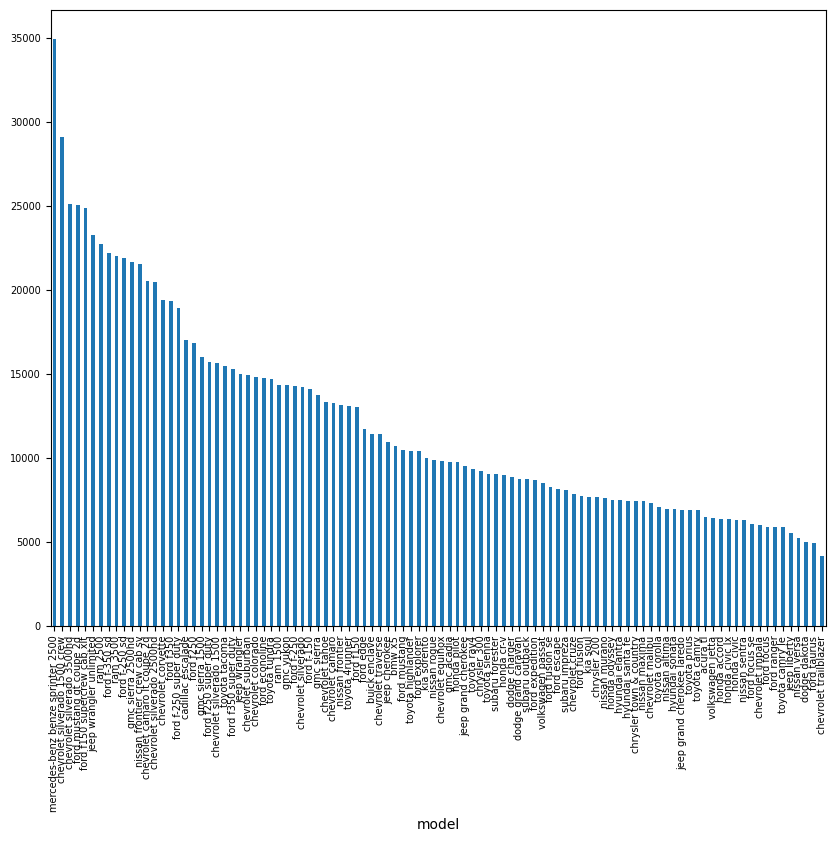

In [35]:
model_stat = data_new.pivot_table(index='model', values='price')
print(model_stat['price'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 8), fontsize=7))

<AxesSubplot: xlabel='model'>

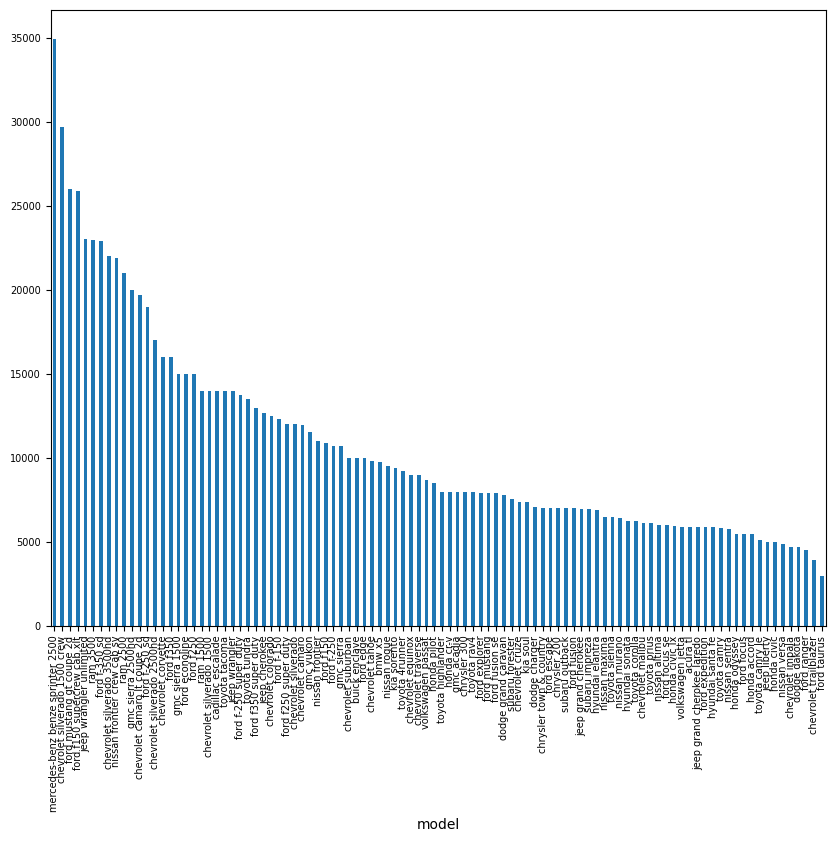

In [36]:
model_stat_median = data_new.pivot_table(index='model', values='price', aggfunc='median')
model_stat_median['price'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 8), fontsize=7)

Dua model memang tidak nampak perbedaanya antara mean dan median, namun model for chevrolet nampak jauh perbedaannya. Hal ini menunjukkan ada data yang membuat perbandingan harga antara mean dan median berubah jauh. Mungkin efek dari harga 1.000000 mempengaruhi perbedaan tersebut. Model lain mungkin mengalami hal yang serupa.

Nilai agregat (seperti rata-rata dan median) tidak pernah mengungkapkan keseluruhan cerita. Inilah saatnya bagi Anda untuk terlibat langsung dan memeriksa distribusi kolom `price`.

array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

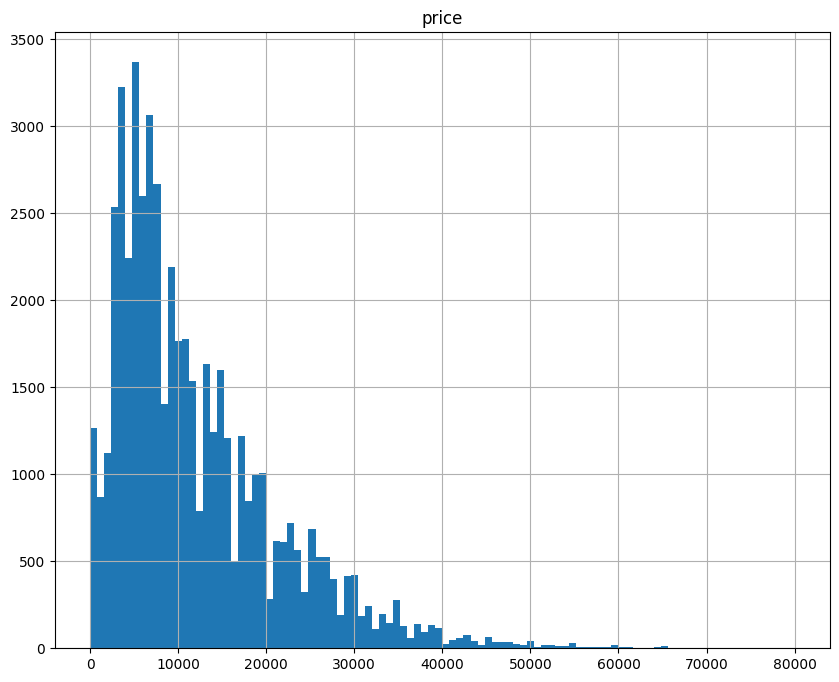

In [37]:
data_new.hist('price', bins=100, range=(0, 80000), figsize=(10, 8)) 

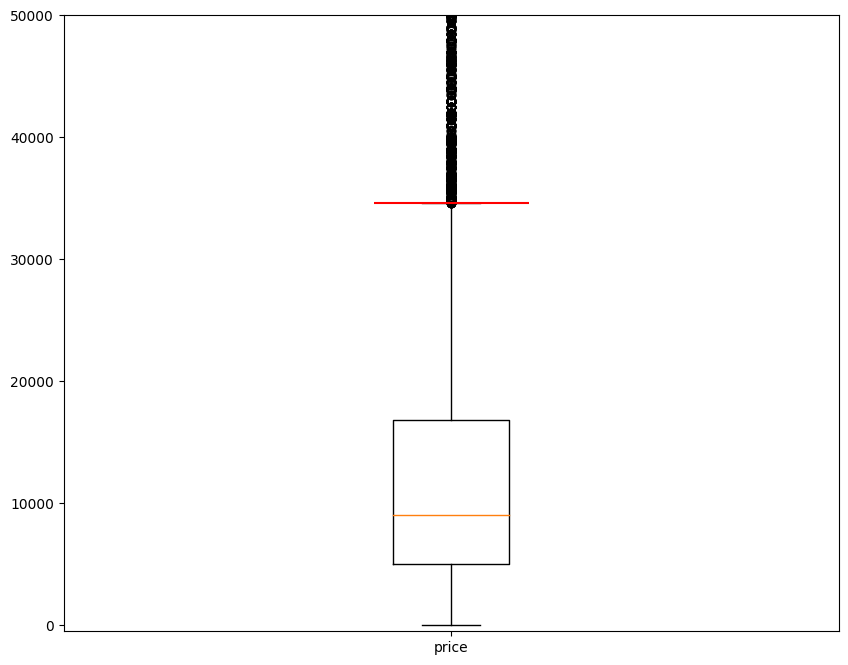

In [38]:
harga = data_new['price']

fig, ax = plt.subplots(figsize=(10, 8))

ax.boxplot(harga, labels=['price'])

Q1 = harga.quantile(0.25)
Q3 = harga.quantile(0.75)
IQR = Q3 - Q1

plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.ylim(-500,  50000)
plt.show()


In [39]:
data_new['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

### 2.2. Mempelajari Parameter Inti 

Untuk mempelajari outlier memengaruhi bentuk dan kemudahan pembacaan analisis, dilakukan pendekatan kepada beberapa parameter berikut:

- Harga,
- Usia kendaraan ketika iklan ditayangkan,
- Jarak tempuh,
- Kondisi, dan
- Jumlah silinder 

In [40]:
data_new[['price', 'car_age', 'odometer', 'condition', 'cylinders']]

,price,car_age,odometer,condition,cylinders
0,9400,7,145000.0,2,6.0
1,25500,7,88705.0,2,6.0
2,5500,6,110000.0,4,4.0
3,1500,16,181613.0,1,8.0
4,14900,2,80903.0,3,4.0
...,...,...,...,...,...
51520,9249,5,88136.0,4,6.0
51521,2700,16,181500.0,0,4.0
51522,3950,9,128000.0,3,4.0
51523,7455,5,139573.0,2,4.0


Kolom `price` dan `odometer` memiliki variabel kuantitatif. Maka diagram Histogram dan Boxplot dapat digunakan.

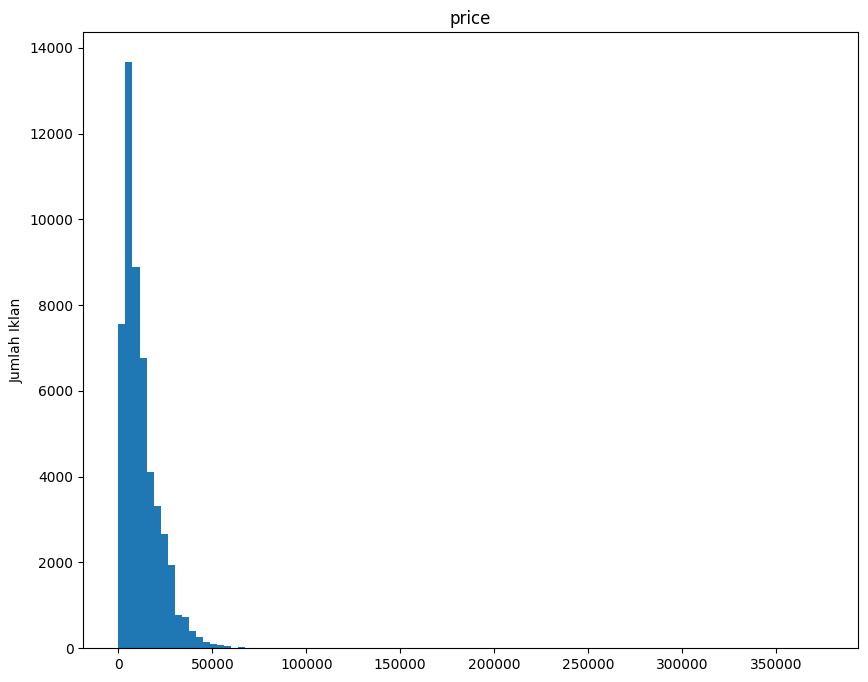

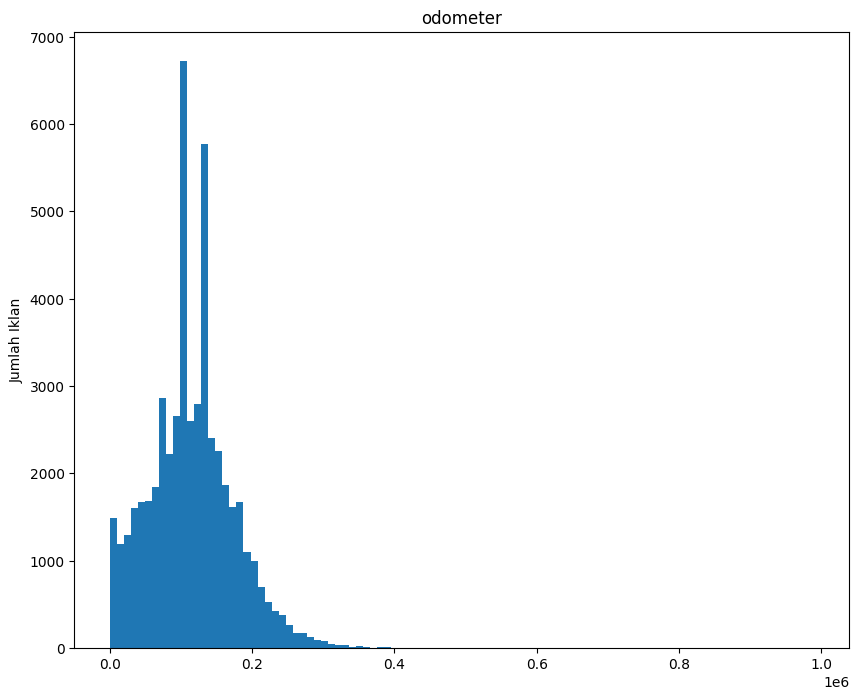

In [60]:
kuantitatif_column = ['price', 'odometer']

for column in kuantitatif_column:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10,8))

    # Plot a histogram for the column
    ax.hist(data_new[column], bins=100)

    # Set the x-axis and y-axis labels
    plt.xlabel('')
    plt.ylabel('Jumlah Iklan')
    plt.title(column)

    # Show the plot
    plt.show()

**Kesimpulan sementara:**

* Sebagian besar histogram nilainya mendekati nol. Berdasarkan histogram harga median, dapat disimpulkan bahwa ini adalah outlier. Nilai-nilai yang berada pada angka 0 ini bukanlah harga yang sebenarnya; melainkan adalah perhitungan yang salah — mereka mungkin mewakili para penjual yang mengambil harga murah untuk menarik pelanggan secara iklan dan bukan harga asli saat transaksi, atau semacamnya.

* Nilai yang mendekati nol pada kolom `odometer` tidak menjadi masalah, karena mobil bisa memiliki odometer yang masih nol atau belum dipakai.


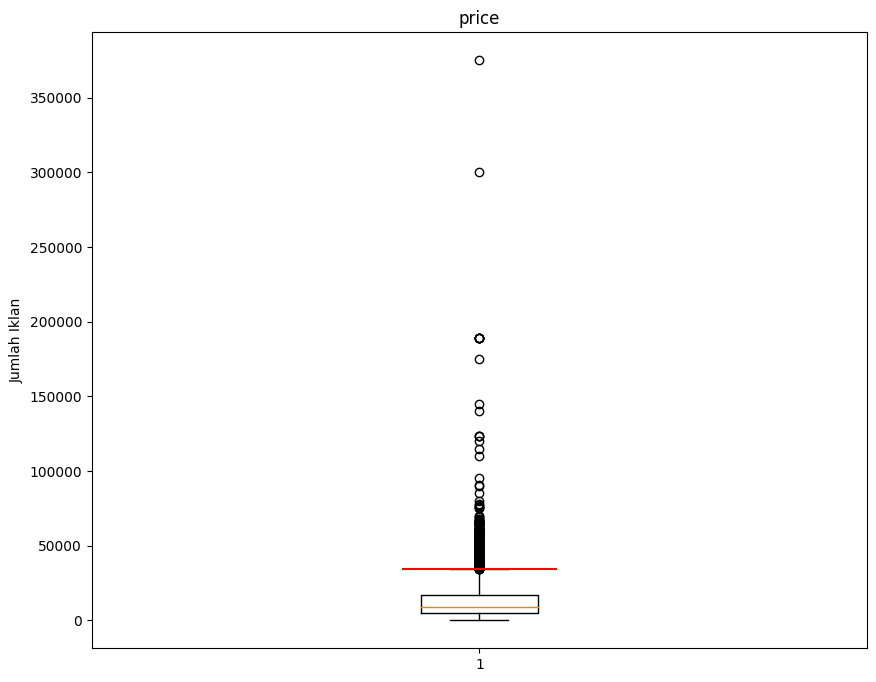

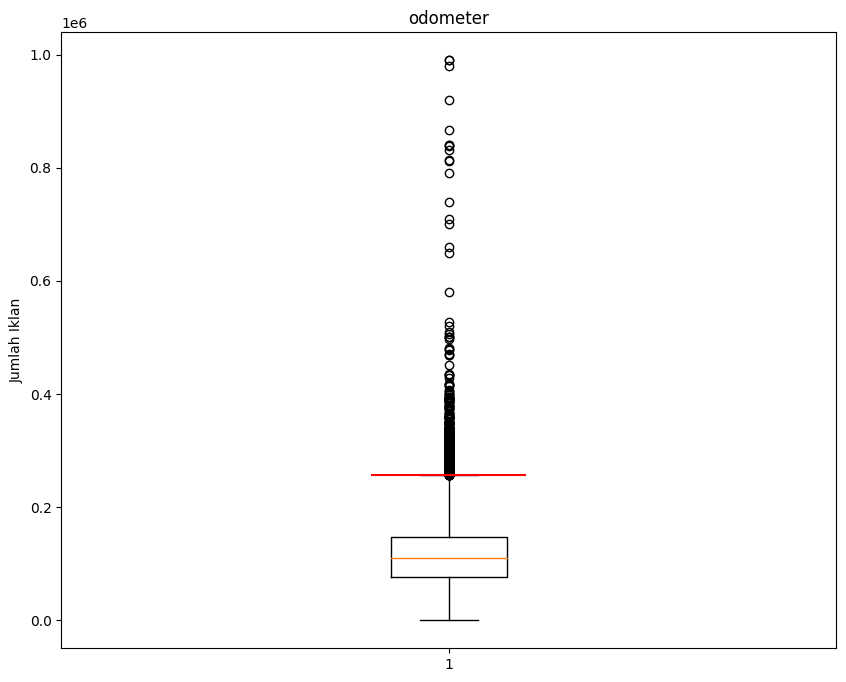

In [63]:
for column in kuantitatif_column:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10,8))

    # Plot a boxplot for the column
    ax.boxplot(data_new[column])

    # Set the x-axis and y-axis labels
    Q1 = data_new[column].quantile(0.25)
    Q3 = data_new[column].quantile(0.75)
    IQR = Q3 - Q1

    plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')
    plt.xlabel('')
    plt.ylabel('Jumlah Iklan')
    plt.title(column)

    # Show the plot
    plt.show()

In [67]:
data_new[['price', 'odometer']].describe()

,price,odometer
count,51525.000000,51525.000000
mean,12132.464920,115199.014508
std,10040.803015,60484.863376
min,1.000000,0.000000
25%,5000.000000,75668.000000
50%,9000.000000,110908.000000
75%,16839.000000,147821.000000
max,375000.000000,990000.000000


**Kesimpulan sementara:**

Nilai rata-rata lebih rendah dari median yang berarti bahwa distribusinya banyak nilai yang rendah, sehingga  menggeser nilai rata-rata ke bawah tanpa memengaruhi mediannya.


Kolom `car_age`, `condition` dan `cylinders` memiliki variabel katagorik. Maka diagram batang dapat digunakan.

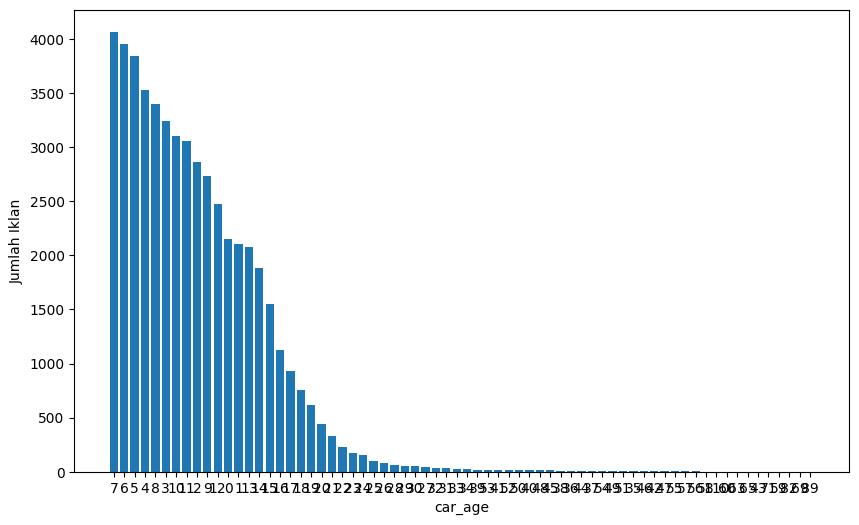

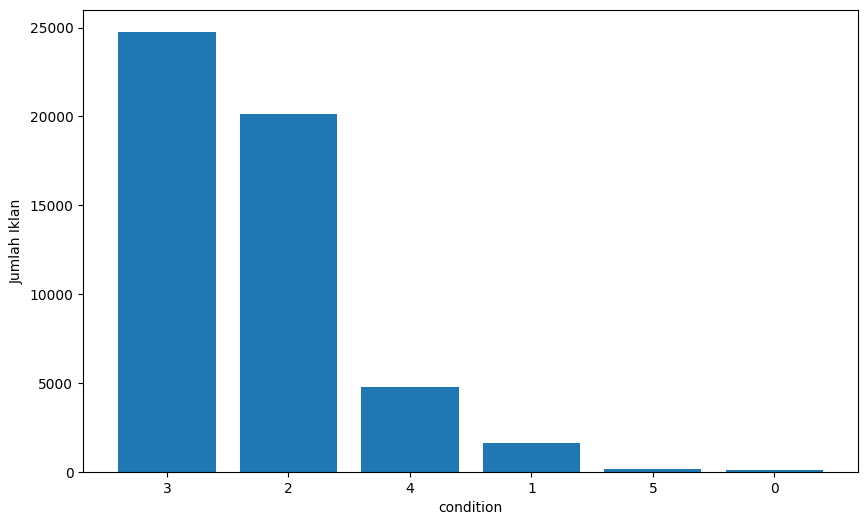

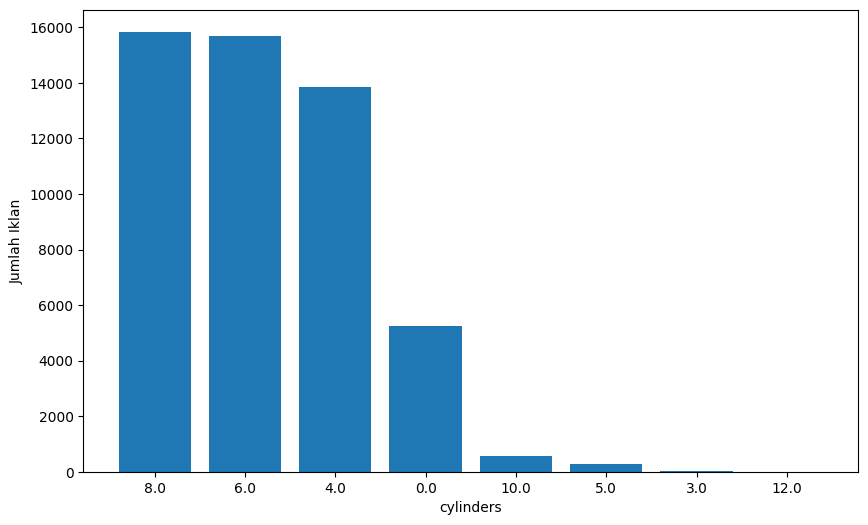

In [86]:
katagoris_column = ['car_age', 'condition', 'cylinders']

# Loop through the column names
for column in katagoris_column:
# Create a figure and axis
    fig, ax = plt.subplots(figsize=(10,6))

    # Get the counts of each category in the column
    counts = data_new[column].value_counts()

    # Set the x-axis values
    x_pos = range(len(counts))

    # Plot a bar chart with the counts
    ax.bar(x_pos, counts)

    # Set the x-axis labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels(counts.index)

    plt.xlabel(column)
    plt.ylabel('Jumlah Iklan')
    plt.show()

## Mempelajari dan Menangani Outlier

[Dengan hasil di atas, tentukan kolom apa yang mungkin berisi *outlier*, dan buatlah sebuah DataFrame tanpa *outlier* tersebut. Petunjuk: *Outlier* dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.]

In [ ]:
# Tentukan batas bawah outlier 


In [ ]:
# Tentukan batas atas outlier 


In [ ]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah



## Mempelajari Parameter Inti Tanpa Outlier

[Gunakan data yang telah difilter untuk membuat grafik baru. Bandingkan dengan data sebelumnya (yang berisi *outlier*). Tarik kesimpulan masing-masing.]

## Masa Berlaku Iklan 
[Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat, dan kapan iklan ditayangkan dalam waktu yang sangat lama.]

## Harga Rata-Rata Setiap Jenis Kendaraan

[Lakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buatlah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Pilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.]

## Faktor Harga

[Apakah faktor yang paling memengaruhi harga kendaraan? Ambil masing-masing jenis kendaraan populer yang Anda temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buatlah grafik *boxplot* untuk variabel kategorik (jenis transmisi dan warna), lalu buatlah *scatterplot* untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.]

[Manfaatkan matriks korelasi dan plot korelasi]

## Kesimpulan Umum
[Tuliskan kesimpulan penting Anda di bagian akhir ini, pastikan kesimpulan tersebut menyertakan kesimpulan yang menjelaskan cara Anda memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, *outlier*, dan kemungkinan alasan serta solusi untuk permasalahan yang harus Anda tangani. Jangan lupa untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.]